In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("Student_Performance.csv")

In [3]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
data.shape

(10000, 6)

In [6]:
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
data.duplicated().sum()

127

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(9873, 6)

In [10]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [11]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

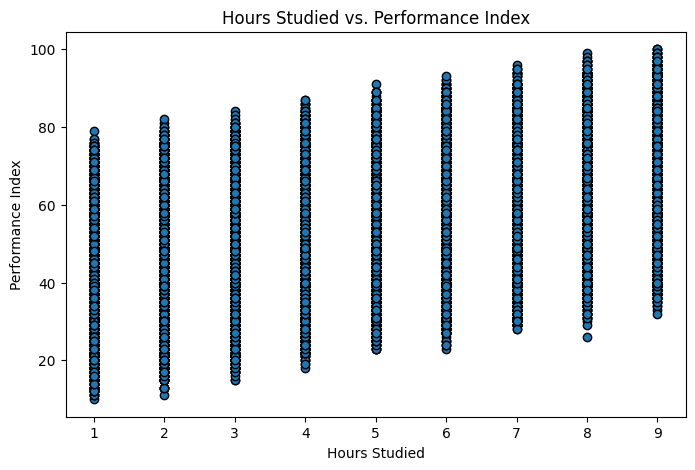

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(data['Hours Studied'], data['Performance Index'],  edgecolors='black')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs. Performance Index')
plt.show()

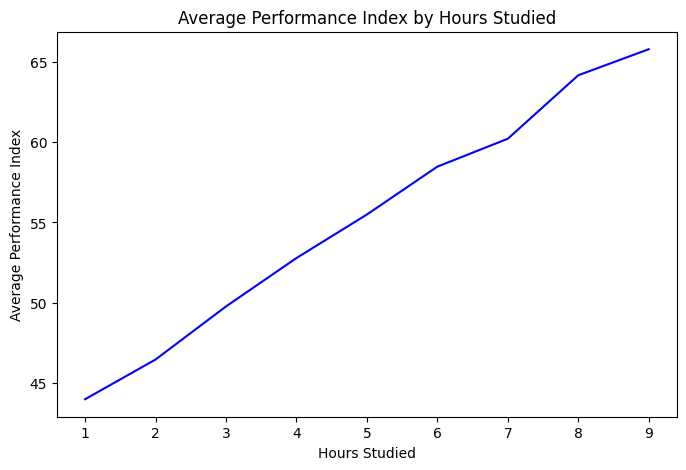

In [13]:
plt.figure(figsize=(8,5))
avg_performance_by_hours = data.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values, color="blue")
plt.xlabel('Hours Studied')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Hours Studied')
plt.show()

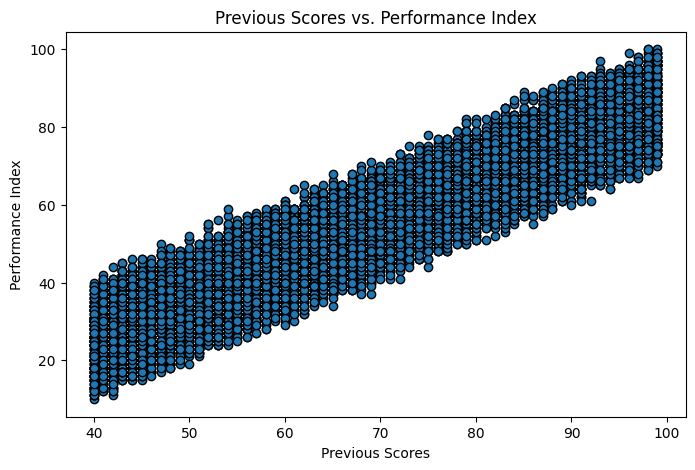

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(data['Previous Scores'], data['Performance Index'], edgecolors='black')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Previous Scores vs. Performance Index')
plt.show()

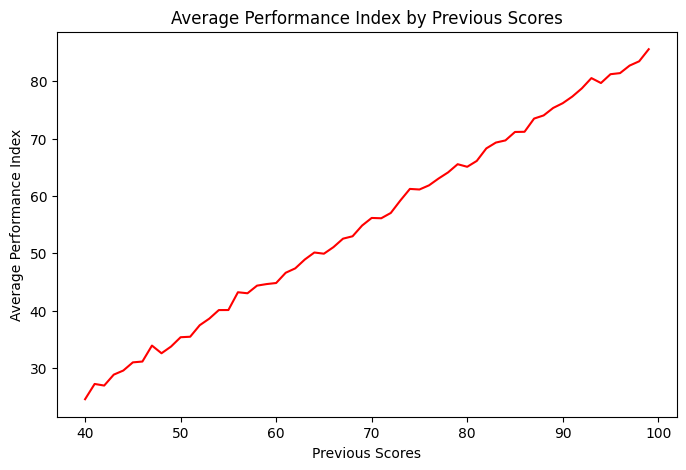

In [15]:
plt.figure(figsize=(8,5))
avg_performance_by_hours = data.groupby('Previous Scores')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values, color="red")
plt.xlabel('Previous Scores')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Previous Scores')
plt.show()

C:\Users\Use5r\AppData\Local\Temp\ipykernel_6836\99285459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Extracurricular Activities', y='Performance Index', data=data, palette="viridis")


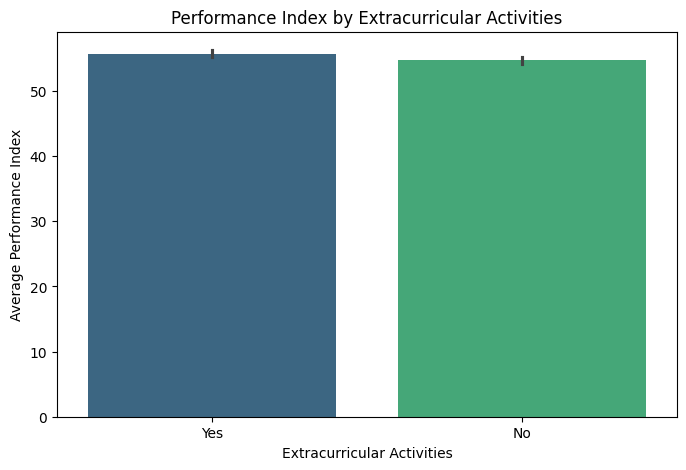

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x='Extracurricular Activities', y='Performance Index', data=data, palette="viridis")
plt.xlabel('Extracurricular Activities')
plt.ylabel('Average Performance Index')
plt.title('Performance Index by Extracurricular Activities')
plt.show()

C:\Users\Use5r\AppData\Local\Temp\ipykernel_6836\3064023394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.countplot(x="Sleep Hours", data=data, palette="coolwarm")


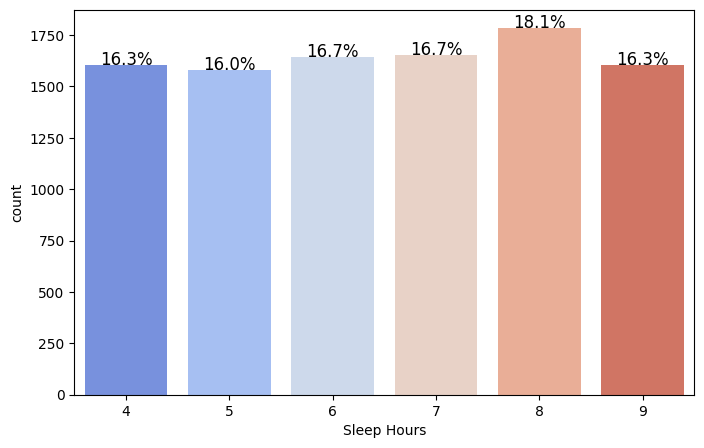

In [17]:
plt.figure(figsize=(8,5))
bar_plot = sns.countplot(x="Sleep Hours", data=data, palette="coolwarm")
total = len(data["Sleep Hours"])

for p in bar_plot.patches:
    bar_plot.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5,
                  f'{(p.get_height() / total) * 100:.1f}%', ha='center', fontsize=12)

plt.show()

C:\Users\Use5r\AppData\Local\Temp\ipykernel_6836\36076124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.countplot(x="Sample Question Papers Practiced", data=data, palette="coolwarm")


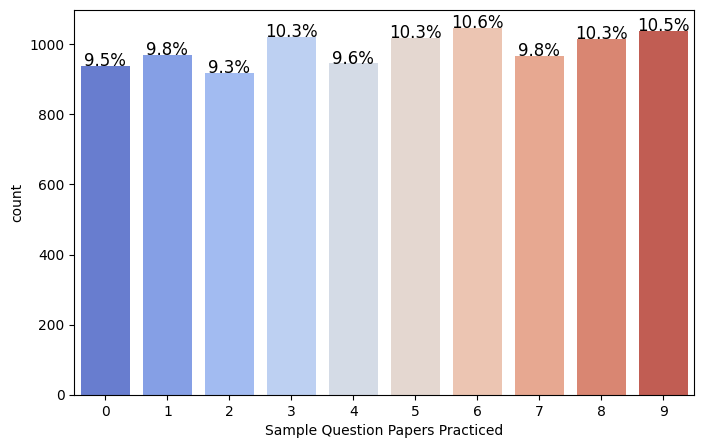

In [18]:
plt.figure(figsize=(8,5))
bar_plot = sns.countplot(x="Sample Question Papers Practiced", data=data, palette="coolwarm")
total = len(data["Sample Question Papers Practiced"])

for p in bar_plot.patches:
    bar_plot.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5,
                  f'{(p.get_height() / total) * 100:.1f}%', ha='center', fontsize=12)

plt.show()

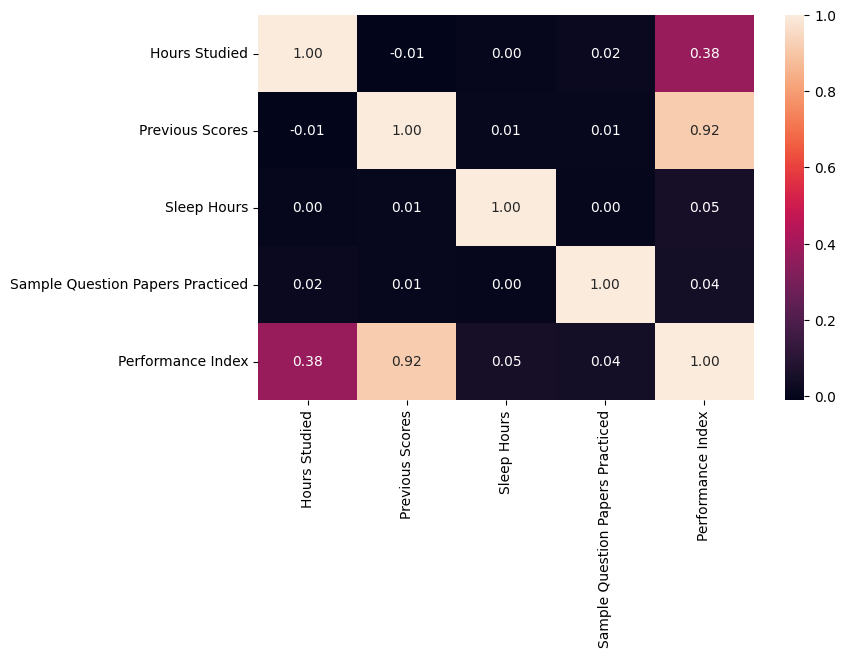

In [19]:
plt.figure(figsize = (8,5))
sns.heatmap(data.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f")
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [21]:
data["Extracurricular Activities"].head(5)

0    Yes
1     No
2    Yes
3    Yes
4     No
Name: Extracurricular Activities, dtype: object

In [22]:
encoder = LabelEncoder()

data["Extracurricular Activities"] =  encoder.fit_transform(data["Extracurricular Activities"])


In [23]:
data["Extracurricular Activities"].head(5)

0    1
1    0
2    1
3    1
4    0
Name: Extracurricular Activities, dtype: int32

In [24]:
Train = data.drop(columns = "Performance Index")
Target = data["Performance Index"]

In [25]:
Train.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [26]:
Target.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(Train, Target, test_size = 0.2, random_state = 42)

In [28]:
print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (7898, 5)
y_train shape:  (7898,)
x_test shape:  (1975, 5)
y_test shape:  (1975,)


In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
model.score(X_train, y_train)

0.9887391160677558

In [32]:
predict = np.round(model.predict(X_test), decimals = 1)

In [33]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6099,47.0,46.5
106,76.0,80.3
9265,62.0,61.1
4707,23.0,22.7
2155,76.0,74.8
...,...,...
8732,19.0,18.3
3112,39.0,40.3
5297,77.0,77.1
6116,88.0,86.2


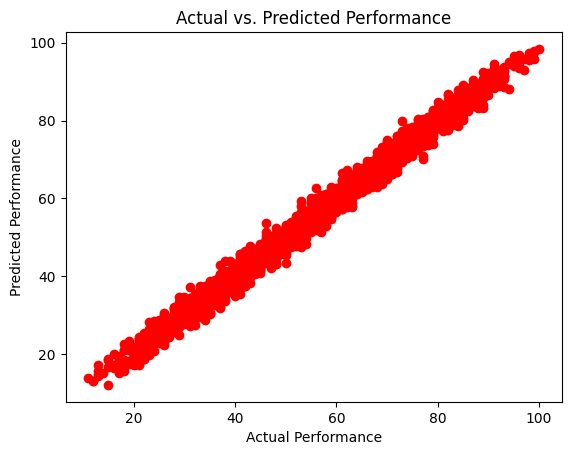

In [34]:
plt.scatter(y_test, predict, color = 'red')
plt.xlabel('Actual Performance')
plt.ylabel('Predicted Performance')
plt.title('Actual vs. Predicted Performance')
plt.show()

In [35]:
mean_absolute_error(y_test,predict)

1.6469367088607596

In [36]:
r2_score(y_test,predict)

0.9884215285728708

In [37]:
model.coef_

array([2.8510219 , 1.01843034, 0.57382297, 0.47207329, 0.18870366])

In [38]:
model.intercept_

-33.981324496440706

In [39]:
import joblib
joblib.dump(model,'linear_model.pkl')

['linear_model.pkl']